In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [4]:
# Configure logging
logging.basicConfig(
    filename='exploratory_analysis.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

In [6]:
# Load cleaned data
try:
    train = pd.read_csv('../scripts/train_cleaned.csv')
    test = pd.read_csv('../scripts/test_cleaned.csv')
    logging.info("Cleaned data loaded successfully.")
except Exception as e:
    logging.error(f"Error loading cleaned data: {e}")
    raise

/tmp/ipykernel_46737/1733980343.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../scripts/train_cleaned.csv')
/tmp/ipykernel_46737/1733980343.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../scripts/test_cleaned.csv')


/tmp/ipykernel_46737/1643797582.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../scripts/train_cleaned.csv')
/tmp/ipykernel_46737/1643797582.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../scripts/test_cleaned.csv')


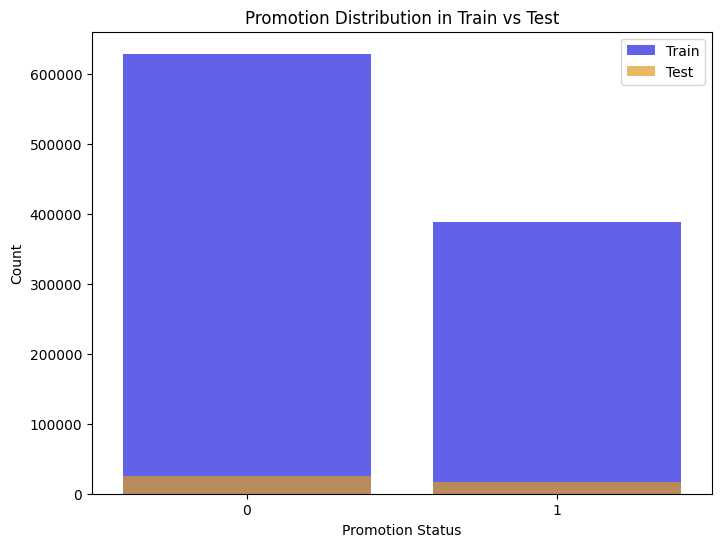

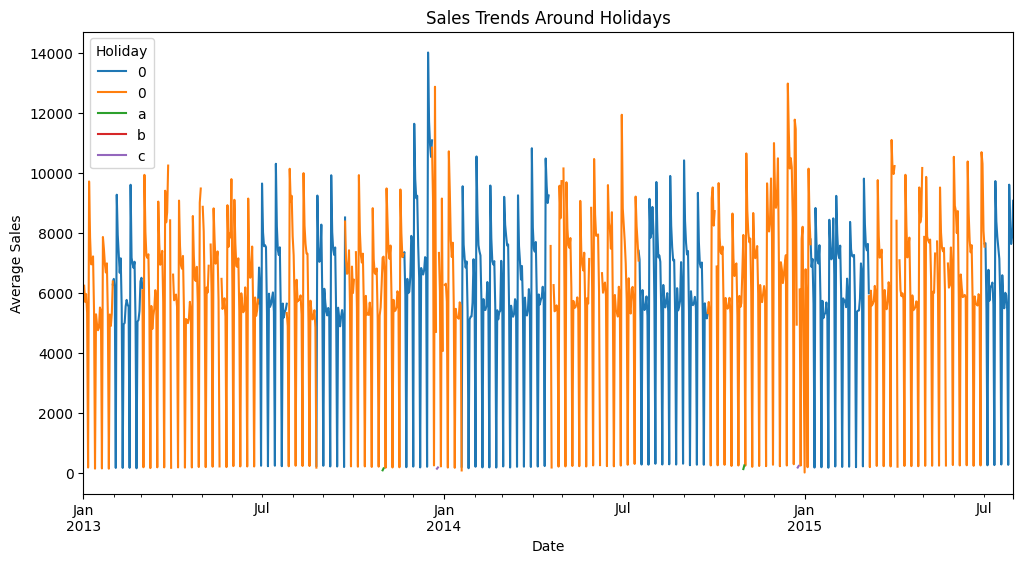

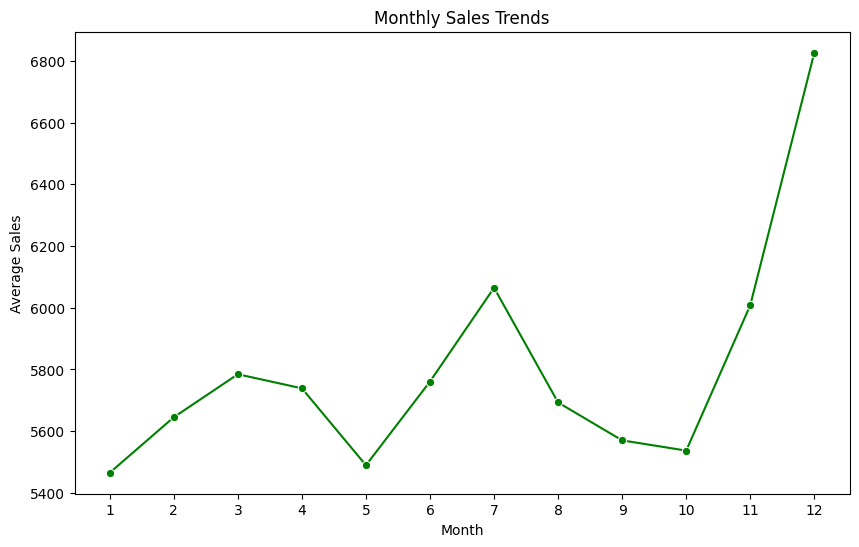

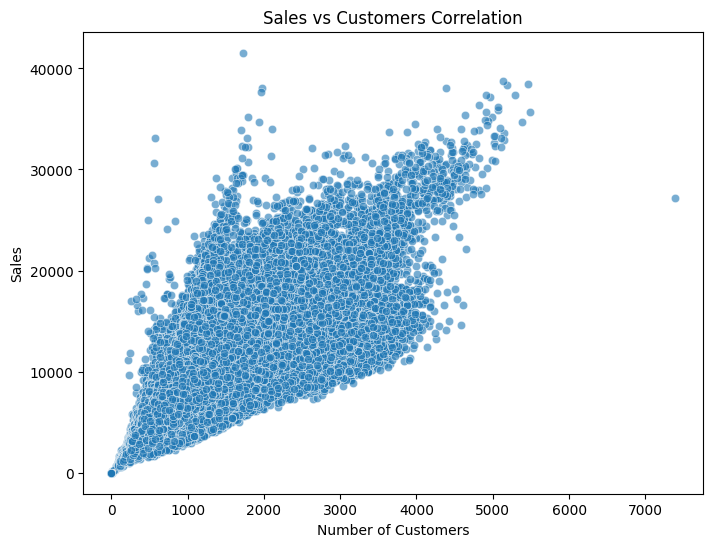

/tmp/ipykernel_46737/1643797582.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_customers.index, y=promo_customers.values, palette='viridis')


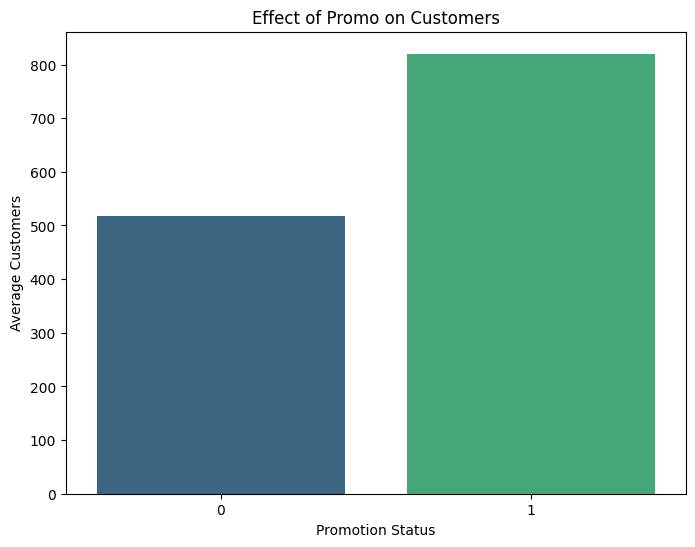

/tmp/ipykernel_46737/1643797582.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assortment_sales.index, y=assortment_sales.values, palette='coolwarm')


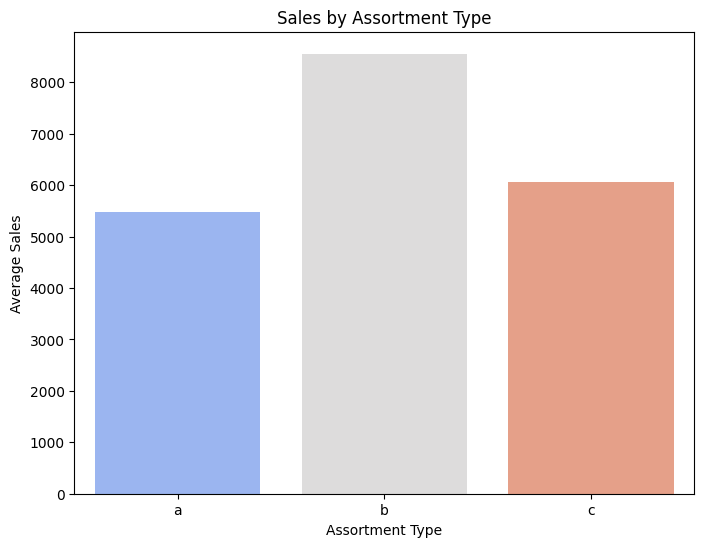

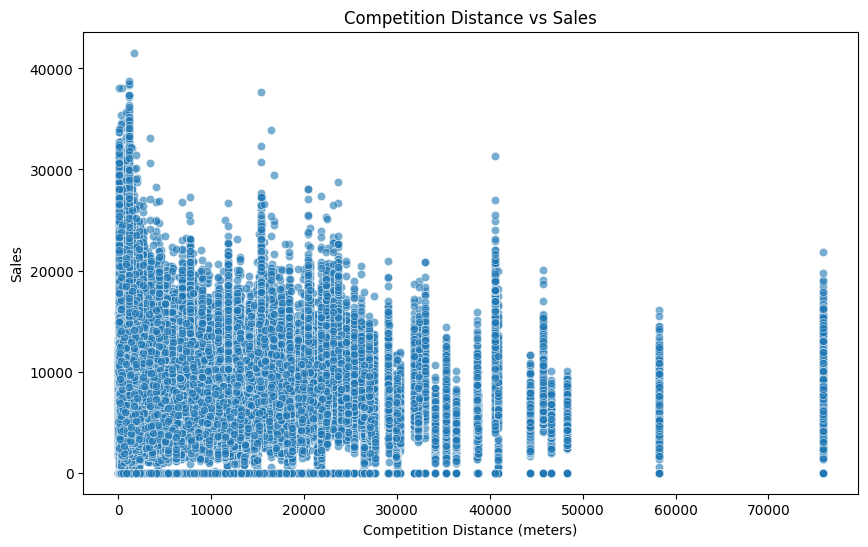

/tmp/ipykernel_46737/1643797582.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_interval_sales.index, y=promo_interval_sales.values, palette='pastel')


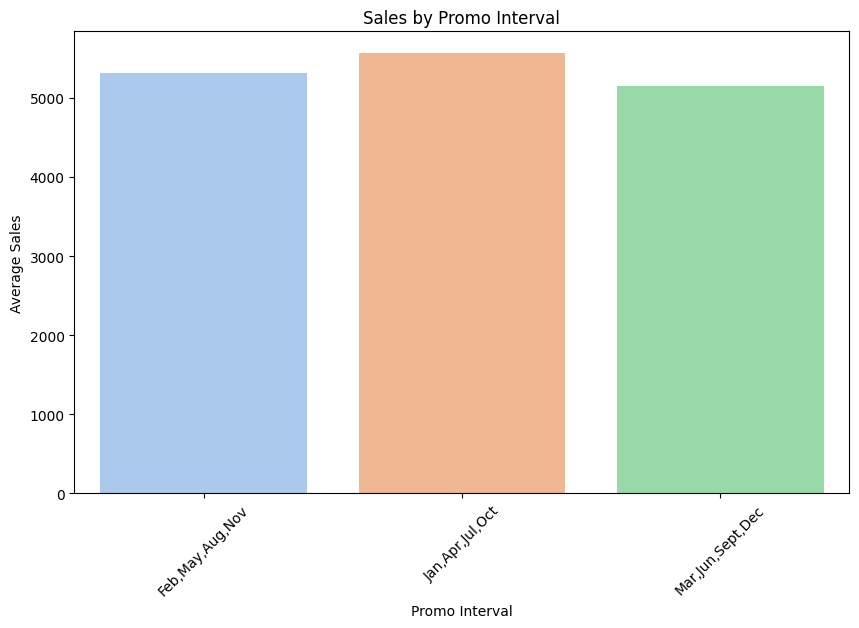

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
train = pd.read_csv('../scripts/train_cleaned.csv')
test = pd.read_csv('../scripts/test_cleaned.csv')

# Visualization 1: Promotions in Train vs Test
train_promotions = train['Promo'].value_counts()
test_promotions = test['Promo'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=train_promotions.index, y=train_promotions.values, label='Train', color='blue', alpha=0.7)
sns.barplot(x=test_promotions.index, y=test_promotions.values, label='Test', color='orange', alpha=0.7)
plt.xlabel('Promotion Status')
plt.ylabel('Count')
plt.title('Promotion Distribution in Train vs Test')
plt.legend()
plt.show()

# Visualization 2: Sales Trends Around Holidays
train['Date'] = pd.to_datetime(train['Date'])
holiday_sales = train.groupby(['Date', 'StateHoliday'])['Sales'].mean().unstack()

plt.figure(figsize=(12, 6))
holiday_sales.plot(ax=plt.gca())
plt.title('Sales Trends Around Holidays')
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.legend(title='Holiday')
plt.show()

# Visualization 3: Monthly Sales Trends
train['Month'] = train['Date'].dt.month
monthly_sales = train.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.show()

# Visualization 4: Sales vs. Customers Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['Customers'], y=train['Sales'], alpha=0.6)
plt.title('Sales vs Customers Correlation')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Visualization 5: Promo Effect on Customers
promo_customers = train.groupby('Promo')['Customers'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=promo_customers.index, y=promo_customers.values, palette='viridis')
plt.title('Effect of Promo on Customers')
plt.xlabel('Promotion Status')
plt.ylabel('Average Customers')
plt.show()

# Visualization 6: Assortment Type vs Sales
assortment_sales = train.groupby('Assortment')['Sales'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=assortment_sales.index, y=assortment_sales.values, palette='coolwarm')
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()

# Visualization 7: Competitor Distance vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['CompetitionDistance'], y=train['Sales'], alpha=0.6)
plt.title('Competition Distance vs Sales')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.show()

# Visualization 8: Promo Interval Effect
promo_interval_sales = train.groupby('PromoInterval')['Sales'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=promo_interval_sales.index, y=promo_interval_sales.values, palette='pastel')
plt.title('Sales by Promo Interval')
plt.xlabel('Promo Interval')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()